In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score


In [17]:
import os

path = os.listdir('C:\\SCDProject\\svmModel\\')
classes = {'ak':0,'bcc':1}



In [18]:
import cv2
X = []
Y = []
#classs = ['ak','bcc']
for cls in classes:
    pth = 'C:\\SCDProject\\svmModel\\'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'//'+j,0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])



In [19]:
np.unique(Y)

array([0, 1])

In [20]:
X = np.array(X)
Y = np.array(Y)


In [21]:
pd.Series(Y).value_counts()

1    3323
0     867
dtype: int64

In [23]:
X.shape

(4190, 200, 200)

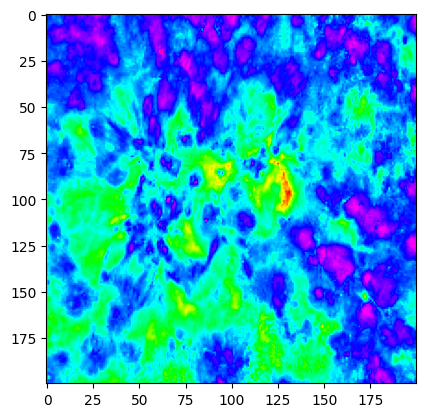

In [25]:
plt.imshow(X[0],cmap='hsv')


In [27]:
X_upd = X.reshape(len(X),-1)
X_upd.shape

(4190, 40000)

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(X_upd,Y,random_state=10,test_size=.20)

In [29]:
xtrain.shape,xtest.shape

((3352, 40000), (838, 40000))

In [30]:
ytrain.shape

(3352,)

In [31]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

xtrain = xtrain/255
xtest = xtest/255

print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

lg = LogisticRegression(C=0.1)
lg.fit(xtrain,ytrain)

C:\SCDProject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [33]:
sv = SVC()
sv.fit(xtrain,ytrain)

SVC()

In [35]:
print(f"Training score : {lg.score(xtrain,ytrain)}")
print(f"Testing score : {lg.score(xtest,ytest)}")

Training score : 0.826073985680191
Testing score : 0.7649164677804295


In [36]:
print(f"Training score : {lg.score(xtrain,ytrain)}")
print(f"Testing score : {lg.score(xtest,ytest)}")

Training score : 0.826073985680191
Testing score : 0.7649164677804295


In [ ]:
pred = sv.predict()